In [1]:
%matplotlib inline
import pandas as pd

# An Introduction to Pandas

From its website: http://pandas.pydata.org/pandas-docs/stable/

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python. Additionally, it has the broader goal of becoming the **most powerful and flexible open source data analysis / manipulation tool available in any language.** It is already well on its way toward this goal.

(In other words: welcome to open-sourced Excel, in Python.)

Pandas has two main objects: 
1. Series (columns)
1. DataFrames (tables)

We'll talk about these in turn.

There is documentation here:

http://pandas.pydata.org/pandas-docs/stable/dsintro.html

Of all the tutorials, I think Greg Reda's does the best job introducing the concepts, and giving you a flavor of the great things that are possible:

http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

**We're going to start today, with basically technical instructions.  On Wednesday we'll do more examples together.**




Where are we going?  We want to be able to quickly import, manipulate, and visualize datasets.  Pandas is the way to do it.

,Temperature [F],Precipitation [In]
Date,,
2013-01-01,15.333333,0.0
2013-01-02,21.083333,0.0
2013-01-03,22.666667,0.0
2013-01-04,29.266667,0.0
2013-01-05,35.144444,0.0


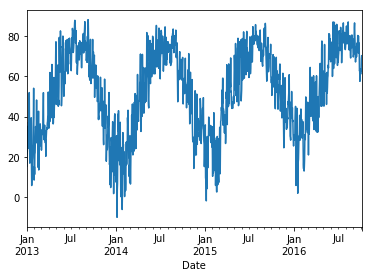

In [2]:
df = pd.read_csv("data/evening_temp_agg.csv", index_col = 'Date', parse_dates = ['Date'])
df["Temperature [F]"].plot()
df.head()

Import these, from the get-go:

In [3]:
import pandas as pd
import json # a familiar friend

# these may be useful later
import numpy as np
from matplotlib import pyplot as plt

# This allows the plots to show up in jupyter.
%matplotlib inline

# Series 

## Initializing
Series are similar to dictionaries or lists, from which they can be built.

In [4]:
fruit = ["apples", "pears", "mangos"]
pd.Series(fruit)

0    apples
1     pears
2    mangos
dtype: object

In [5]:
primes = [2, 3, 5, 7, 11]
pd.Series(primes)

0     2
1     3
2     5
3     7
4    11
dtype: int64

Although pandas recognizes consistent data types automatically (see: dtype), and it's generally useful for data to have consistent types, they don't _have_ to:

In [6]:
s = pd.Series(["one", 2, "three", 4, "five"])
s

0      one
1        2
2    three
3        4
4     five
dtype: object

You'll have noticed that each time, the index values are listed next to the items that we've made.  We can access the items exactly as we would a list or a dictionary.

In [7]:
s[3]

4

As with lists, you can modify the values in the Series:

In [8]:
squares = pd.Series([i*i for i in range(0, 12)])
squares[2] = 0 # Altering existing values
squares[4] = 0
squares[6] = 0
squares[8] = 0
squares[10] = 0
squares[25] = "hello!" # Adding a whole new row!
squares

0          0
1          1
2          0
3          9
4          0
5         25
6          0
7         49
8          0
9         81
10         0
11       121
25    hello!
dtype: object

In each case above, the index just counted from 0 upwards.  But using the "`index`" argument, we can specify it explicitly if we so desire:

In [9]:
pd.Series([i for i in range(1, 10)], index = [i * i for i in range(1, 10)])

1     1
4     2
9     3
16    4
25    5
36    6
49    7
64    8
81    9
dtype: int64

We can also define a series from a dictionary.

In [10]:
s = pd.Series({"one" : 1, "two" : 2, "three" : 3, "four" : 4})
s

four     4
one      1
three    3
two      2
dtype: int64

As you might expect, the key becomes the index, and the value becomes ... the value

In [11]:
s["two"]

2

If you don't like the way it's sorted, you can always change it:

In [12]:
s.sort_values() # perhaps one comes before two?

one      1
two      2
three    3
four     4
dtype: int64

As with dictionaries, you can put anything in as the index.

For instance, I could put in dates:

In [13]:
import datetime 
s = pd.Series({datetime.date(2001, 12, 31) : 1, 
               datetime.date(2002,  1,  1) : 2, 
               datetime.date(2002,  1,  2) : 3, 
               datetime.date(2002,  1,  3) : 4, 
               datetime.date(2002,  1,  4) : 5, 
               datetime.date(2002,  1,  5) : 6})

print(s)
# -- does not exist: s["2001-12-31"]
s[datetime.date(2002, 1, 2)]

2001-12-31    1
2002-01-01    2
2002-01-02    3
2002-01-03    4
2002-01-04    5
2002-01-05    6
dtype: int64


3

## Magic

Until now, you might have convinced yourself that this is basically a dictionary.  But Series have some wonderful functionality.

### Series-Wide Operations

We can perform basic operations on the entire list.

For instance, let's make a series of squares, with a list comprehension:

In [14]:
squares = pd.Series([i * i for i in range(1, 7)])
squares

0     1
1     4
2     9
3    16
4    25
5    36
dtype: int64

We can multiply the entire list by a number

In [15]:
squares / 2

0     0.5
1     2.0
2     4.5
3     8.0
4    12.5
5    18.0
dtype: float64

HO LY SH*T, let's do that again!

In [16]:
squares * 2

0     2
1     8
2    18
3    32
4    50
5    72
dtype: int64

Or we can manipulate several equal-size lists:

In [17]:
squares * squares

0       1
1      16
2      81
3     256
4     625
5    1296
dtype: int64

Let's just get carried away.  "Everything in moderation, including moderation," am I right?

In [18]:
x = pd.Series(range(-5, 6))
3 * x ** 2 - 6 * x - 9

0     96
1     63
2     36
3     15
4      0
5     -9
6    -12
7     -9
8      0
9     15
10    36
dtype: int64

Take a moment to consider what happens if we work with multiple series:

In [19]:
roots = pd.Series([i for i in range(1, 7)], 
                  index = [i * i for i in range(1, 7)])
print(squares)
print(roots)
print(roots * squares)

0     1
1     4
2     9
3    16
4    25
5    36
dtype: int64
1     1
4     2
9     3
16    4
25    5
36    6
dtype: int64
0      NaN
1      4.0
2      NaN
3      NaN
4     50.0
5      NaN
9      NaN
16     NaN
25     NaN
36     NaN
dtype: float64


Wow... I'm just blushing. 

It _matches_ the friggin index, do you see that?

And when it can't match, it marks as not-a-number.

This is magnificent.

What about like, exponentiating?  Can I do that?

In [20]:
import math
# math.pow(2, squares)

If only.  But wait!!  The **numpy** module makes it possible!!

In [21]:
import numpy as np
np.power(2, squares)

0              2
1             16
2            512
3          65536
4       33554432
5    68719476736
dtype: int64

It contains other great mathematical functions as well!!

In [22]:
little_steps = pd.Series([x*0.01 for x in range(1257)],
                         index = [x*0.01 for x in range(1257)])
my_sin = np.sin(little_steps)
my_sin

0.00     0.000000
0.01     0.010000
0.02     0.019999
0.03     0.029996
0.04     0.039989
0.05     0.049979
0.06     0.059964
0.07     0.069943
0.08     0.079915
0.09     0.089879
0.10     0.099833
0.11     0.109778
0.12     0.119712
0.13     0.129634
0.14     0.139543
0.15     0.149438
0.16     0.159318
0.17     0.169182
0.18     0.179030
0.19     0.188859
0.20     0.198669
0.21     0.208460
0.22     0.218230
0.23     0.227978
0.24     0.237703
0.25     0.247404
0.26     0.257081
0.27     0.266731
0.28     0.276356
0.29     0.285952
           ...   
12.27   -0.292051
12.28   -0.282473
12.29   -0.272866
12.30   -0.263232
12.31   -0.253571
12.32   -0.243886
12.33   -0.234176
12.34   -0.224442
12.35   -0.214686
12.36   -0.204909
12.37   -0.195111
12.38   -0.185294
12.39   -0.175458
12.40   -0.165604
12.41   -0.155734
12.42   -0.145849
12.43   -0.135948
12.44   -0.126035
12.45   -0.116108
12.46   -0.106170
12.47   -0.096222
12.48   -0.086263
12.49   -0.076296
12.50   -0.066322
12.51   -0

That last one was a bit much.  Let's just look at the `head()` (it's back)!

In [23]:
my_sin.head()

0.00    0.000000
0.01    0.010000
0.02    0.019999
0.03    0.029996
0.04    0.039989
dtype: float64

* "Verily," says I, "this is an extraordinary development.  I can perform functions on an entire list in a blink."
* "Of course, I could have done this all before, with list comprehensions," naysays the naysayer.
* "Not so prettily," says I.

### Plotting

We'll play with this more on Wednesday, but it's ever so easy to plot.

We'll always need this 'magic' for matplotlib, to see the plots in Jupyter:

In [24]:
%matplotlib inline

Then it is truly trivial

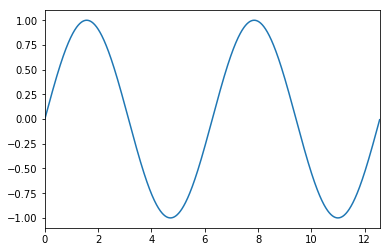

In [25]:
my_sin.plot() 

`"line"` is the default; we can also make a `"hist"`, etc.

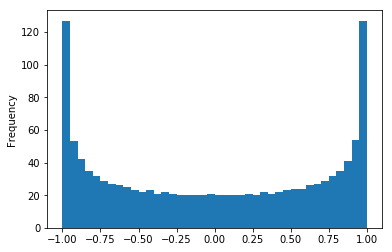

In [26]:
my_sin.plot(kind = "hist", bins = 40)

* **<font color=darkred>Create a single series, `x`, with integer value indices and values from -20 to 20.</font>**
* **<font color=darkred>Use `x` to plot the curve _x³/10 - 20x + 50_</font>**

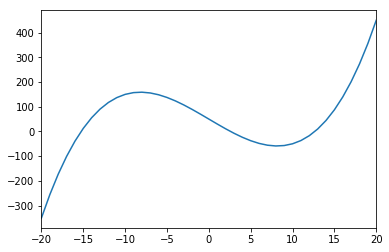

In [27]:
x = pd.Series(index = range(-20, 21), data = range(-20, 21))

(x**3/10 - 20*x + 50).plot()

### Masking

Just as we could perform conditionals in list comprehensions, we can filter elements out with conditions.

We do this by creating a "mask", like so:

In [28]:
(my_sin >= 0).head()

0.00    True
0.01    True
0.02    True
0.03    True
0.04    True
dtype: bool

If you think about this operation for a minute, it's very strange: we're asking whether a list -- not a value -- is greater than a value.  It's like asking: is (-3, 2, 0, 1) strictly positive?  The answer given is (False, True, False, True).  

Note that this mask is _itself_ a Series:

In [29]:
mask = my_sin >= 0
type(mask)

pandas.core.series.Series

Using this, we can select all those elements that satisfy the condition (for which the `mask` Series is true).

This is a very new syntax, totally particular to pandas.

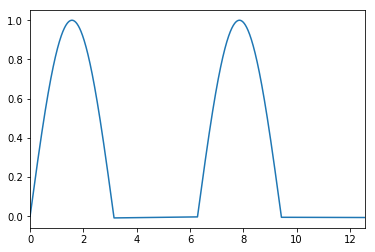

In [30]:
my_sin[my_sin >= -0.01].plot()

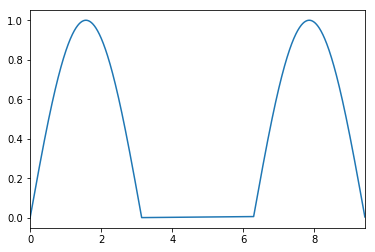

In [31]:
my_sin[mask].plot()

## <font color=darkred>This is a core concept!!</font>  

## The syntax is `series[mask]`, where `mask` is a series of boolean values.  This retains the `True` values.

## It will be the same for dataframes, below!!

You could also invert this, to get the negative values.

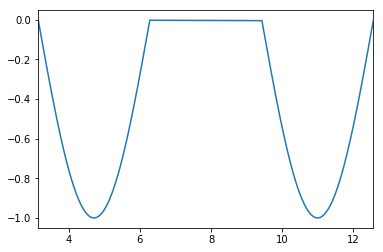

In [32]:
my_sin[mask == False].plot()

And one could also just slice out points by _index_ instead of by value:

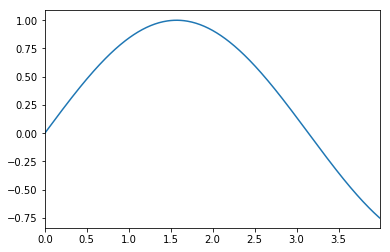

In [33]:
my_sin[my_sin.index < 4].plot()

And you could combine multiple masks together, with & (and) or | (or).

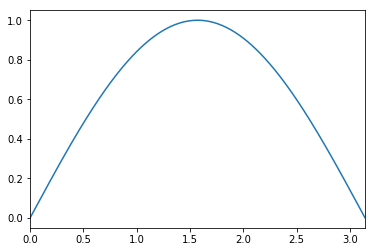

In [34]:
my_sin[(my_sin.index < 6.28) & (my_sin >= 0)].plot()

So in short: we can apply any filter to our data -- based on the values or indices.

Functionally this is similar to the `if` statement in list comprehensions ... but the syntax there  that is obviously more verbose:

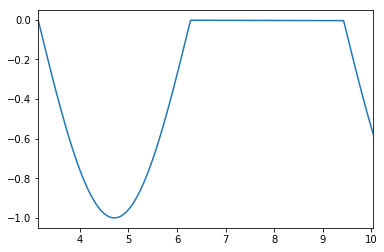

In [35]:
little_steps = pd.Series([0.01*x for x in range(1005) if math.sin(0.01*x) < 0],
                         index = [0.01*x for x in range(1005) if math.sin(0.01*x) < 0])
little_steps_sin = np.sin(little_steps)
little_steps_sin.plot()

A series is an iterable, so you can loop over it:

In [36]:
squares = pd.Series([i * i for i in range(1, 7)])
for s in squares: print(s)

1
4
9
16
25
36


Like enumerating a list or asking for a dictionary's `items()`, you can iterate over a key/value pair:

In [37]:
squares = pd.Series([i * i for i in range(1, 7)],
                    index = ["a", "b", "c", "d", "e", "f"])

for k, v in squares.items(): print(k, v)

a 1
b 4
c 9
d 16
e 25
f 36


### A Review

Series are very much lists or, more so, dictionaries.

But they come with some extra great functions:
1. We can perform series-wide operations and execute functions on the entire thing, with ease!
2. We can slice out parts of the data with a new syntax that is "fairly intuitive."
3. Plotting is a cinch -- we'll come back to this.

# DataFrames

**Data frames consist of multiple series on a common index.**

If we have a simple series like this:

In [38]:
x = pd.Series([x for x in range(8)])
x

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

We can could build the dataframe from a dictionary of lists:

In [39]:
df = pd.DataFrame({"linear"    : x**1,
                   "quadratic" : x**2,
                   "cubic"     : x**3,
                   "quartic"   : x**4})
df

,cubic,linear,quadratic,quartic
0,0,0,0,0
1,1,1,1,1
2,8,2,4,16
3,27,3,9,81
4,64,4,16,256
5,125,5,25,625
6,216,6,36,1296
7,343,7,49,2401


Or as a list of dictionaries (what does this look like!?):

In [40]:
ld = [{"A" : x**1, "B" : x**2, "C" : x**3, "D" : x**4} for x in range(1, 8)]
ld

[{'A': 1, 'B': 1, 'C': 1, 'D': 1},
 {'A': 2, 'B': 4, 'C': 8, 'D': 16},
 {'A': 3, 'B': 9, 'C': 27, 'D': 81},
 {'A': 4, 'B': 16, 'C': 64, 'D': 256},
 {'A': 5, 'B': 25, 'C': 125, 'D': 625},
 {'A': 6, 'B': 36, 'C': 216, 'D': 1296},
 {'A': 7, 'B': 49, 'C': 343, 'D': 2401}]

In [41]:
pd.DataFrame(ld)

,A,B,C,D
0,1,1,1,1
1,2,4,8,16
2,3,9,27,81
3,4,16,64,256
4,5,25,125,625
5,6,36,216,1296
6,7,49,343,2401


Or as a 2D list:

In [42]:
my_2d_list = [[x**1, x**2, x**3, x**4] for x in range(8)]
my_2d_list

[[0, 0, 0, 0],
 [1, 1, 1, 1],
 [2, 4, 8, 16],
 [3, 9, 27, 81],
 [4, 16, 64, 256],
 [5, 25, 125, 625],
 [6, 36, 216, 1296],
 [7, 49, 343, 2401]]

In [43]:
df = pd.DataFrame(my_2d_list)
df

,0,1,2,3
0,0,0,0,0
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81
4,4,16,64,256
5,5,25,125,625
6,6,36,216,1296
7,7,49,343,2401


And we can specify the column names with an extra variable.  See all the arguments here:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [44]:
df = pd.DataFrame(data = my_2d_list, 
                  columns = ["Linear", "Quadratic", "Cubic", "Quartic"])
df

,Linear,Quadratic,Cubic,Quartic
0,0,0,0,0
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81
4,4,16,64,256
5,5,25,125,625
6,6,36,216,1296
7,7,49,343,2401


We could just "concat" together ("along the y axis" -- that is add more _dependent_ variables), and we'd have a dataframe:

In [45]:
pd.concat([x**1, x**2, x**3, x**4], axis = 1)

,0,1,2,3
0,0,0,0,0
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81
4,4,16,64,256
5,5,25,125,625
6,6,36,216,1296
7,7,49,343,2401


* Let's construct two dataframes, ourselves, from a narcotics and census json response, which have different forms.
* There is a `pd.read_json()` function but it is very finnicky, and can't find the data for you -- it doesn't know the difference between the metadata and the real payload.
* So we can load in json objects, and do a tiny bit of formatting, ourselves.

In [46]:
with open("data/narcotics.json") as data: j = json.load(data)
j

{'meta': {'message': [],
  'query': {'crimes_2001_to_present__filter': '{"op": "eq", "col": "primary_type", "val": "NARCOTICS"}',
   'dataset_name': 'crimes_2001_to_present',
   'obs_date__ge': '2016-5-1'},
  'status': 'ok',
  'total': 1000},
 'objects': [{'arrest': True,
   'beat': 522.0,
   'block': '115XX S PRINCETON AVE',
   'case_number': 'HZ456476',
   'community_area': '53',
   'date': '2016-09-30T23:07:00',
   'description': 'POSS: COCAINE',
   'district': 5.0,
   'domestic': False,
   'fbi_code': '18',
   'id': 10700990,
   'iucr': '2022',
   'latitude': 41.68448136,
   'location': '(41.68448136, -87.630065954)',
   'location_description': 'STREET',
   'longitude': -87.630065954,
   'primary_type': 'NARCOTICS',
   'updated_on': '2016-10-07T15:55:01',
   'ward': 34,
   'x_coordinate': 1176349,
   'y_coordinate': 1828401,
   'year': 2016},
  {'arrest': True,
   'beat': 1712.0,
   'block': '053XX N KIMBALL AVE',
   'case_number': 'HZ456454',
   'community_area': '13',
   'date': 

In [47]:
narco = pd.DataFrame(j["objects"])
narco.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,True,522.0,115XX S PRINCETON AVE,HZ456476,53,2016-09-30T23:07:00,POSS: COCAINE,5.0,False,18,...,41.684481,"(41.68448136, -87.630065954)",STREET,-87.630066,NARCOTICS,2016-10-07T15:55:01,34,1176349,1828401,2016
1,True,1712.0,053XX N KIMBALL AVE,HZ456454,13,2016-09-30T22:56:00,POSS: COCAINE,17.0,False,18,...,41.978489,"(41.978489465, -87.713612839)",STREET,-87.713613,NARCOTICS,2016-10-07T15:55:01,39,1152755,1935361,2016
2,True,733.0,008XX W 72ND ST,HZ456463,68,2016-09-30T22:29:00,POSS: HEROIN(BRN/TAN),7.0,False,18,...,41.763376,"(41.763376171, -87.644761151)",SIDEWALK,-87.644761,NARCOTICS,2016-10-07T15:55:01,6,1172105,1857117,2016
3,True,1113.0,044XX W MONROE ST,HZ456380,26,2016-09-30T21:55:00,POSS: CRACK,11.0,False,18,...,41.879634,"(41.879633846, -87.736329599)",SIDEWALK,-87.736330,NARCOTICS,2016-10-07T15:55:01,28,1146829,1899294,2016
4,True,422.0,079XX S EXCHANGE AVE,HZ456385,46,2016-09-30T21:28:00,MANU/DEL:CANNABIS OVER 10 GMS,4.0,False,18,...,41.751345,"(41.751345114, -87.552890215)",SIDEWALK,-87.552890,NARCOTICS,2016-10-07T15:55:01,7,1197209,1852947,2016


In [48]:
with open("data/census.json") as data: j = json.load(data)
census = pd.DataFrame(data = j[1:], columns = j[0])
census

,NAME,B16010_001E,B06012_002E,B06012_001E,B16010_041E,state,county,tract
0,"Census Tract 101, Cook County, Illinois",2949,1212,4083,1138,17,031,010100
1,"Census Tract 102.01, Cook County, Illinois",4563,2321,7073,1458,17,031,010201
2,"Census Tract 102.02, Cook County, Illinois",1781,688,2252,604,17,031,010202
3,"Census Tract 103, Cook County, Illinois",4740,1432,5337,1532,17,031,010300
4,"Census Tract 104, Cook County, Illinois",2431,582,3393,1654,17,031,010400
5,"Census Tract 105.01, Cook County, Illinois",2919,813,3822,1437,17,031,010501
6,"Census Tract 105.02, Cook County, Illinois",2138,1540,3605,1026,17,031,010502
7,"Census Tract 105.03, Cook County, Illinois",1454,848,2150,606,17,031,010503
8,"Census Tract 106, Cook County, Illinois",4822,999,6394,2273,17,031,010600
9,"Census Tract 107.01, Cook County, Illinois",2691,565,3930,1115,17,031,010701


What if we didn't like these names for our census objects and wanted better names for our columns? 

We can fix this with `rename`.  Note the argument `inplace = True`.

In [49]:
census.rename(columns = {"B16010_041E" : "Pop25BA",
                         "B16010_001E" : "Pop25", 
                         "B06012_002E" : "PovLevelBelow",
                         "B06012_001E" : "PovLevelNum"}, inplace = True)
census.head()

,NAME,Pop25,PovLevelBelow,PovLevelNum,Pop25BA,state,county,tract
0,"Census Tract 101, Cook County, Illinois",2949,1212,4083,1138,17,031,010100
1,"Census Tract 102.01, Cook County, Illinois",4563,2321,7073,1458,17,031,010201
2,"Census Tract 102.02, Cook County, Illinois",1781,688,2252,604,17,031,010202
3,"Census Tract 103, Cook County, Illinois",4740,1432,5337,1532,17,031,010300
4,"Census Tract 104, Cook County, Illinois",2431,582,3393,1654,17,031,010400


For json, the helper function pd.io.json.json_normalize can at least "flatten out" json objects multiple levels deep:

In [50]:
with open("data/elevations.json") as data: j = json.load(data)
j["results"][:3] # "lat" and "lng" are both under "location"

[{'elevation': 3.444408893585205,
  'location': {'lat': 40.7127837, 'lng': -74.0059413},
  'resolution': 9773.0068359375},
 {'elevation': 109.0185394287109,
  'location': {'lat': 34.0522342, 'lng': -118.2436849},
  'resolution': 9773.0068359375},
 {'elevation': 182.5778350830078,
  'location': {'lat': 41.8781136, 'lng': -87.6297982},
  'resolution': 9773.0068359375}]

In [51]:
pd.DataFrame(j["results"]).head()

,elevation,location,resolution
0,3.444409,"{'lat': 40.7127837, 'lng': -74.0059413}",9773.006836
1,109.018539,"{'lat': 34.0522342, 'lng': -118.2436849}",9773.006836
2,182.577835,"{'lat': 41.8781136, 'lng': -87.6297982}",9773.006836
3,14.734677,"{'lat': 29.7604267, 'lng': -95.3698028}",4886.503418
4,330.123260,"{'lat': 33.4483771, 'lng': -112.0740373}",9773.006836


In [52]:
pd.io.json.json_normalize(j["results"]).head()

,elevation,location.lat,location.lng,resolution
0,3.444409,40.712784,-74.005941,9773.006836
1,109.018539,34.052234,-118.243685,9773.006836
2,182.577835,41.878114,-87.629798,9773.006836
3,14.734677,29.760427,-95.369803,4886.503418
4,330.123260,33.448377,-112.074037,9773.006836


That's it -- that's a data frame.

## Manipulating Dataframes: Accessing Data and Calculating New Fields

To get a series back out again, 

In [53]:
print(type(census["NAME"]))
census["NAME"].head()

<class 'pandas.core.series.Series'>


0       Census Tract 101, Cook County, Illinois
1    Census Tract 102.01, Cook County, Illinois
2    Census Tract 102.02, Cook County, Illinois
3       Census Tract 103, Cook County, Illinois
4       Census Tract 104, Cook County, Illinois
Name: NAME, dtype: object

But you can also get a smaller dataframe back out, by using **double** brackets.  Columns can be referenced either by their names or their position.

In [54]:
census[[0,5,6,7]].head()

,NAME,state,county,tract
0,"Census Tract 101, Cook County, Illinois",17,031,010100
1,"Census Tract 102.01, Cook County, Illinois",17,031,010201
2,"Census Tract 102.02, Cook County, Illinois",17,031,010202
3,"Census Tract 103, Cook County, Illinois",17,031,010300
4,"Census Tract 104, Cook County, Illinois",17,031,010400


What's great is that the slicing and plotting magic still work.  This is a super common way of examining a subset of the data that satisfies some (potentially complex) condition:

In [55]:
census[census["PovLevelNum"].astype(int) > 9000]

,NAME,Pop25,PovLevelBelow,PovLevelNum,Pop25BA,state,county,tract
386,"Census Tract 3201, Cook County, Illinois",9193,953,10269,7273,17,031,320100
389,"Census Tract 3301, Cook County, Illinois",14160,1547,17396,9897,17,031,330100
762,"Census Tract 8036.06, Cook County, Illinois",4711,3063,9131,1188,17,031,803606
786,"Census Tract 8043.10, Cook County, Illinois",6470,209,9339,3074,17,031,804310
794,"Census Tract 8045.07, Cook County, Illinois",8673,522,12552,4230,17,031,804507
1100,"Census Tract 8241.17, Cook County, Illinois",6813,230,9883,2885,17,031,824117
1173,"Census Tract 8285.06, Cook County, Illinois",5447,2265,9241,1525,17,031,828506
1192,"Census Tract 8299.01, Cook County, Illinois",6588,930,9136,2163,17,031,829901


### IMPORTANT -- Core Concepts!!!  

### The square brackets are "overloaded," and their behavior depends on what you put within them!!
* If you pass in a **value** (column position or name), you'll get back a **single series** (column).
* If you pass in a **list of columns**, you'll get a df with just **those columns.**
* If you pass in a **boolean series**, you'll get a df with just the **relevant rows.**

We can also create entirely new columns on the fly.  To do this, in this case, we'll need to convert the data types:

In [56]:
census.head()

,NAME,Pop25,PovLevelBelow,PovLevelNum,Pop25BA,state,county,tract
0,"Census Tract 101, Cook County, Illinois",2949,1212,4083,1138,17,031,010100
1,"Census Tract 102.01, Cook County, Illinois",4563,2321,7073,1458,17,031,010201
2,"Census Tract 102.02, Cook County, Illinois",1781,688,2252,604,17,031,010202
3,"Census Tract 103, Cook County, Illinois",4740,1432,5337,1532,17,031,010300
4,"Census Tract 104, Cook County, Illinois",2431,582,3393,1654,17,031,010400


In [57]:
census.dtypes

NAME             object
Pop25            object
PovLevelBelow    object
PovLevelNum      object
Pop25BA          object
state            object
county           object
tract            object
dtype: object

In [58]:
census["Pop25BA"]       = census["Pop25BA"].astype(int)
census["Pop25"]         = census["Pop25"].astype(int)
census["PovLevelBelow"] = census["PovLevelBelow"].astype(int)
census["PovLevelNum"]   = census["PovLevelNum"].astype(int)

In [59]:
census.dtypes

NAME             object
Pop25             int64
PovLevelBelow     int64
PovLevelNum       int64
Pop25BA           int64
state            object
county           object
tract            object
dtype: object

In [60]:
census["BA Frac"] = census["Pop25BA"] / census["Pop25"]
census["Poverty Rate"] = census["PovLevelBelow"] / census["PovLevelNum"]

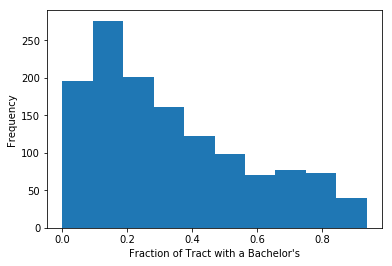

In [61]:
ax = census["BA Frac"].plot(kind = "hist")
ax.set_xlabel("Fraction of Tract with a Bachelor's")

## Imports and Exploration
This is all fairly cool.  The other big thing that should get you excited, is Pandas's facilities for importing file formats and quickly exploring datasets.  We don't have to do all this stuff by hand anymore.  CSV, Excel, and SQL databases are all completely transparent.  It's just json that requires a little bit of futzing (as above).

For instance -- we've seen this before:

In [62]:
df = pd.read_csv("data/salaries.csv")
df.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,90744.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,84450.0
2,"AARON, KARINA",POLICE OFFICER,POLICE,84450.0
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,89880.0
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,106836.0


That was easy!

(Full disclosure: to simplify things a little bit, I've already removed the pesky blank line at the end, and taken out the dollar signs.  This would take a few more lines, normally -- would look like this.)

Most of the time, Pandas infers the correct data types.

In [63]:
df.dtypes

Name                       object
Position Title             object
Department                 object
Employee Annual Salary    float64
dtype: object

In [64]:
df["Employee Annual Salary"] = df["Employee Annual Salary"].replace("\$", "", regex = True).astype(float)
df.dropna(inplace = True)

But let's just look at the data, using `describe()`.  This gives us some immediate statistics on the floating point fields (the salary).  The inner-quartile workers are pretty well paid!  

In [65]:
df.describe()

,Employee Annual Salary
count,32062.000000
mean,80204.178634
std,25098.329868
min,0.960000
25%,72862.400000
50%,84450.000000
75%,93240.000000
max,300000.000000


We can also see the beginning or end of the data:

In [66]:
df.head(5)

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,90744.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,84450.0
2,"AARON, KARINA",POLICE OFFICER,POLICE,84450.0
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,89880.0
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,106836.0


In [67]:
df.tail(5)

,Name,Position Title,Department,Employee Annual Salary
32057,"ZYGADLO, MICHAEL J",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,99528.0
32058,"ZYGOWICZ, PETER J",POLICE OFFICER,POLICE,87384.0
32059,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,84450.0
32060,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,87384.0
32061,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,113664.0


If there were a lot of columns, we could readily list them, or their datatypes.  Note that it is a member variable and _not_ a function:

In [68]:
df.columns

Index(['Name', 'Position Title', 'Department', 'Employee Annual Salary'], dtype='object')

In [69]:
df.dtypes

Name                       object
Position Title             object
Department                 object
Employee Annual Salary    float64
dtype: object

## Grouping
One of the most powerful functionalities is _aggregating_ over a field.  For instance:

In [70]:
df.groupby('Department').mean().head(5)

,Employee Annual Salary
Department,
ADMIN HEARNG,76829.846154
ANIMAL CONTRL,54977.498507
AVIATION,73619.429849
BOARD OF ELECTION,56175.487179
BOARD OF ETHICS,86697.333333


### Core concept alert!!

There's a LOT going on there.  We are dividing the dataset up according to one column, and then ask for the mean of each of those groups... in just a few words.

We can then sort this dataset to answer a lot of the questions that we've answered more-slowly before:

In [71]:
total_salaries = df.groupby('Department').sum()
total_salaries.sort_values(by = "Employee Annual Salary", ascending = False).head(5)

,Employee Annual Salary
Department,
POLICE,1.092850e+09
FIRE,4.589802e+08
WATER MGMNT,1.574423e+08
STREETS & SAN,1.483406e+08
AVIATION,1.119752e+08


There are lots of aggregating functions -- `mean()`, `max()`, `sum()`...

In [72]:
df.groupby('Department')['Employee Annual Salary'].max().sort_values(ascending = False).head(5)

Department
AVIATION          300000.0
MAYOR'S OFFICE    216210.0
FIRE              202728.0
POLICE            197724.0
HEALTH            177000.0
Name: Employee Annual Salary, dtype: float64

In [73]:
df.groupby('Department')['Employee Annual Salary'].sum().sort_values(ascending = False).head(5)

Department
POLICE           1.092850e+09
FIRE             4.589802e+08
WATER MGMNT      1.574423e+08
STREETS & SAN    1.483406e+08
AVIATION         1.119752e+08
Name: Employee Annual Salary, dtype: float64

In [74]:
df.groupby('Department')['Employee Annual Salary'].count().sort_values(ascending = False).head(5)

Department
POLICE           12618
FIRE              4796
STREETS & SAN     2152
OEMC              1982
WATER MGMNT       1840
Name: Employee Annual Salary, dtype: int64

I hope you can imagine lots of uses for this functionality:
* Crimes by census tract, ward, or zip code.
* Campaign contributions by elected official.
* Daily time spent directly engaging children, by educational attainment.

## Merging Data

There is one last big feature of dataframes: the ability to merge/join in a relatively straightforward way.

You've already seen concat, for making an DataFrame from several Series.  It can also be used to glue together multiple dataframes.

**Merge** and **join** also allow us to join together dataframes.  Join is based on merge, and both are based on `concat()`.  They basically perform the same operation, though with different defaults.
* `pd.merge()` is a pandas function taking two datasets, and merging them -- by default on common columns.  The indices can be used instead, using `left_index = True` or `right_index = True`.
* `.join()` is a dataframe method that first tries to merge on the _index_.  If it finds common columns it wil get confused.
However, the two can pretty much accomplish the same thing.

In [75]:
a = pd.DataFrame({"a1" : [i*i for i in range(10)], 
                  "a2" : [a for a in "abcdefghij"],
                  "c"  : range(10)},
                 index = range(0, 20, 2))

b = pd.DataFrame({"b1" : [-i*i for i in range(10)], 
                  "b2" : [a for a in "ABCDEFGHIJ"],
                  "c"  : range(10)},
                 index = range(10))

In [76]:
pd.concat([a, b], axis = 0)

,a1,a2,b1,b2,c
0,0.0,a,NaN,NaN,0
2,1.0,b,NaN,NaN,1
4,4.0,c,NaN,NaN,2
6,9.0,d,NaN,NaN,3
8,16.0,e,NaN,NaN,4
10,25.0,f,NaN,NaN,5
12,36.0,g,NaN,NaN,6
14,49.0,h,NaN,NaN,7
16,64.0,i,NaN,NaN,8
18,81.0,j,NaN,NaN,9


In [77]:
pd.concat([a, b], axis = 1)

,a1,a2,c,b1,b2,c
0,0.0,a,0.0,0.0,A,0.0
1,NaN,NaN,NaN,-1.0,B,1.0
2,1.0,b,1.0,-4.0,C,2.0
3,NaN,NaN,NaN,-9.0,D,3.0
4,4.0,c,2.0,-16.0,E,4.0
5,NaN,NaN,NaN,-25.0,F,5.0
6,9.0,d,3.0,-36.0,G,6.0
7,NaN,NaN,NaN,-49.0,H,7.0
8,16.0,e,4.0,-64.0,I,8.0
9,NaN,NaN,NaN,-81.0,J,9.0


This is pretty amazing -- it matches up the columns by index.

In [78]:
print(a)
print(b)
pd.merge(a, b) # merge on matching columns

    a1 a2  c
0    0  a  0
2    1  b  1
4    4  c  2
6    9  d  3
8   16  e  4
10  25  f  5
12  36  g  6
14  49  h  7
16  64  i  8
18  81  j  9
   b1 b2  c
0   0  A  0
1  -1  B  1
2  -4  C  2
3  -9  D  3
4 -16  E  4
5 -25  F  5
6 -36  G  6
7 -49  H  7
8 -64  I  8
9 -81  J  9


,a1,a2,c,b1,b2
0,0,a,0,0,A
1,1,b,1,-1,B
2,4,c,2,-4,C
3,9,d,3,-9,D
4,16,e,4,-16,E
5,25,f,5,-25,F
6,36,g,6,-36,G
7,49,h,7,-49,H
8,64,i,8,-64,I
9,81,j,9,-81,J


In [79]:
a = pd.DataFrame({"a1" : [i*i for i in range(10)], 
                  "a2" : [a for a in "abcdefghij"],
                   }, #"c"  : range(10)},
                 index = range(0, 20, 2))

b = pd.DataFrame({"b1" : [i*i for i in range(10)], 
                  "b2" : [a for a in "ABCDEFGHIJ"],
                  }, #"c"  : range(10)},
                 index = range(10))

a.join(b)

,a1,a2,b1,b2
0,0,a,0.0,A
2,1,b,4.0,C
4,4,c,16.0,E
6,9,d,36.0,G
8,16,e,64.0,I
10,25,f,NaN,NaN
12,36,g,NaN,NaN
14,49,h,NaN,NaN
16,64,i,NaN,NaN
18,81,j,NaN,NaN


An important idea to understand is right, left, inner, and outer joins: to match a row, do I require an explicit match, or can one or either of the columns be empty?  I tend to think of this as a dinner party.  If I invite all my friends, I want to invite their spouses too.  Imagine I have a dataset of friends and another dataset of spouses.
* If it's a figure skating theme (bear with me), I might consider an inner join: anybody who is coming _has_ to bring a partner.  This is called an inner join.
* Or I could say, "my buddies can come, if they're married or not."  This is a left join (spouse can come, with or without the buddy would be a right join).
* Or I could say, either the friend or the spouse can come -- I love 'em all.  That's an outer join.
All of these are denoted by the `how` keyword.

In [80]:
pd.merge(a, b, left_index = True, right_index = True, how = "inner")

,a1,a2,b1,b2
0,0,a,0,A
2,1,b,4,C
4,4,c,16,E
6,9,d,36,G
8,16,e,64,I


### An Example.

_Pray don't talk to me about the weather, Mr. Worthing. Whenever people talk to me about the weather, I always feel quite certain that they mean something else._

For example, I might want to compare crimes (from the city) to temperature (from Weather Underground).

Imagine that I have prepared datasets for the evening counts of violent crimes, as well as the average evening temperatures.

(By the way, this is an example of precomputing... this step took my computer several minutes, and was accomplished much faster, using the command line tools.)

Noe the use of a new argument, `parse_dates`, which tells pandas to turn the YYYY-MM-DD format into dates!

In [81]:
weather = pd.read_csv("data/evening_temp_agg.csv", index_col = 'Date', parse_dates = ['Date'])
weather.head(5)

,Temperature [F],Precipitation [In]
Date,,
2013-01-01,15.333333,0.0
2013-01-02,21.083333,0.0
2013-01-03,22.666667,0.0
2013-01-04,29.266667,0.0
2013-01-05,35.144444,0.0


In [82]:
crime = pd.read_csv("data/evening_crime_agg.csv", index_col = 'Date', parse_dates = ['Date'])
crime.head(5)

,Count
Date,
2013-01-01,189
2013-01-02,213
2013-01-03,234
2013-01-04,289
2013-01-05,246


It's now really, really easy to plot them against eachother

In [83]:
merged = crime.join(weather)
merged.head()

,Count,Temperature [F],Precipitation [In]
Date,,,
2013-01-01,189,15.333333,0.0
2013-01-02,213,21.083333,0.0
2013-01-03,234,22.666667,0.0
2013-01-04,289,29.266667,0.0
2013-01-05,246,35.144444,0.0


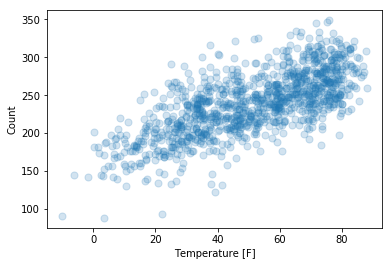

In [84]:
merged.plot(kind = "scatter", x = "Temperature [F]", y = "Count", 
            alpha = 0.20, s = 50)

* A very clear correlation, but this is very naïve -- both temperature and crime go up in the summer... longer days?  Kids off from school?  Families on vacation?
* We'll keep on thinking about this for the next few weeks.
* But hopefully you can already see the utility here.


* The point is that the index has special importance, for reasons for reasons that were perhaps already evident (`squares * roots`).
* We were able to just `join()`, because the indices for the two were already matched up.
* We could have expressed the same thing with `pd.conact(..., axis = 1)` or `pd.merge(...)`:

In [85]:
pd.concat([weather, crime], axis = 1).head()

,Temperature [F],Precipitation [In],Count
Date,,,
2013-01-01,15.333333,0.0,189.0
2013-01-02,21.083333,0.0,213.0
2013-01-03,22.666667,0.0,234.0
2013-01-04,29.266667,0.0,289.0
2013-01-05,35.144444,0.0,246.0


In [86]:
pd.merge(weather, crime, left_index=True, right_index=True).head(5)

,Temperature [F],Precipitation [In],Count
Date,,,
2013-01-01,15.333333,0.0,189
2013-01-02,21.083333,0.0,213
2013-01-03,22.666667,0.0,234
2013-01-04,29.266667,0.0,289
2013-01-05,35.144444,0.0,246


With `pd.merge()` it is also possible to specify names for both of the columns to join on, if they are not the indices (see [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/merging.html)).

To my mind, aggregation and merging are the primary ways that pandas kills spreadsheets: this is very clumsy with pivot tables (`VLOOKUP()`).